In [1]:
import pickle
from pathlib import Path
from periodictable import elements
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import exfor_tools

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [3]:
from query_elastic import print_failed_parses, query_elastic_data, reattempt_parse

In [4]:
import jitr

In [5]:
proton = (1, 1)
neutron = (1, 0)

In [6]:
target = (90, 40)

In [7]:
(
    (entries_pp, failed_parses_pp),
    (entries_ppr, failed_parses_ppr),
    (entries_nn, failed_parses_nn),
) = query_elastic_data(target)


Parsing (p,p) ...
Found subentry C0085002 with the following columns:
['EN', 'DATA-ERR', 'ANG-CM', 'DATA-CM']
Found subentry C0893028 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry D0295002 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry E0166028 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry O0032021 with the following columns:
['EN', 'ANG-CM', 'DATA', 'ERR-S']
Found subentry O0049009 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']
Failed to parse subentry O0049009:
	Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
Found subentry O0208008 with the following columns:
['EN', 'ERR-1', 'ANG-ERR', 'ANG-CM', 'DATA-CM', 'ERR-2']
Failed to parse subentry O0208008:
	Ambiguous statistical error labels:
ERR-1, ERR-2
Found subentry O0211015 with the following columns:
['EN',

# $(p,p)$

## Handle failed parses for $(p,p)$

In [12]:
print_failed_parses(failed_parses=failed_parses_pp)

Entry: O0049
O0049009  :  Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
Entry: O0208
O0208008  :  Ambiguous statistical error labels:
ERR-1, ERR-2
Entry: O0389
O0389002  :  Ambiguous statistical error labels:
ERR-1, ERR-2
Entry: T0101
T0101003  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR


In [13]:
# per the paper:
# Thl statistical errors for the cross sections were 1 to 2 % for 6 < 25” and 3 to 6 %
# for 6 > 25”. The overall uncertainty in the absolute cross sections was estimated to
# be 5 %

entries_pp["O0049"] = reattempt_parse(
    failed_parses_pp["O0049"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049009 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']


In [14]:
# ERR-ANALYS (ERR-2) Relative error include all sources of error
#           except uncertainty in the target thickness.
# ERR-ANALYS (ERR-1) Uncertainty in the target thickness.
#
entries_pp["O0208"] = reattempt_parse(
    failed_parses_pp["O0208"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0208008 with the following columns:
['EN', 'ERR-1', 'ANG-ERR', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [15]:
entries_pp["O0389"] = reattempt_parse(
    failed_parses_pp["O0389"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0389002 with the following columns:
['EN', 'EN-ERR', 'ANG-ERR', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [16]:
entries_pp["T0101"] = reattempt_parse(
    failed_parses_pp["T0101"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry T0101003 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA', 'DATA-ERR']


## Reject none-useful, discrepant our outlying experiments

In [41]:
del entries_pp["O0032"]  # duplicate to E0166 

KeyError: 'O0032'

# $(p,p)$ ratio

## handle failed parses for $(p,p)$ ratio

In [9]:
print_failed_parses(failed_parses=failed_parses_ppr)

Entry: O0211
O0211007  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T
Entry: O0389
O0389002  :  Ambiguous statistical error labels:
ERR-1
Entry: O1825
O1825003  :  Ambiguous statistical error labels:
ERR-1, ERR-DIG


In [17]:
entries_ppr["O0211"] = reattempt_parse(
    failed_parses_ppr["O0211"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211007 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [ ]:
entries_ppr["O0389"] = reattempt_parse(
    failed_parses_ppr["O0389"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

In [19]:
entries_ppr["O1825"] = reattempt_parse(
    failed_parses_ppr["O1825"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O1825003 with the following columns:
['EN', 'ANG-ERR-D', 'ERR-1', 'ERR-DIG', 'ANG-CM', 'DATA']


## Reject non-useful, discrepant our outlying experiments

## handle failed parses for $(n,n)$

In [20]:
print_failed_parses(failed_parses=failed_parses_nn)

# Plotting

## Plot $(p,p)$

In [42]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(entries_pp)

In [43]:
[[m.Einc for m in l] for l in measurements_categorized]

[[12.7],
 [14.71],
 [16.0],
 [22.5],
 [30.0],
 [40.0],
 [61.4],
 [65.0],
 [80.0],
 [135.0],
 [156.0],
 [160.0],
 [185.0]]

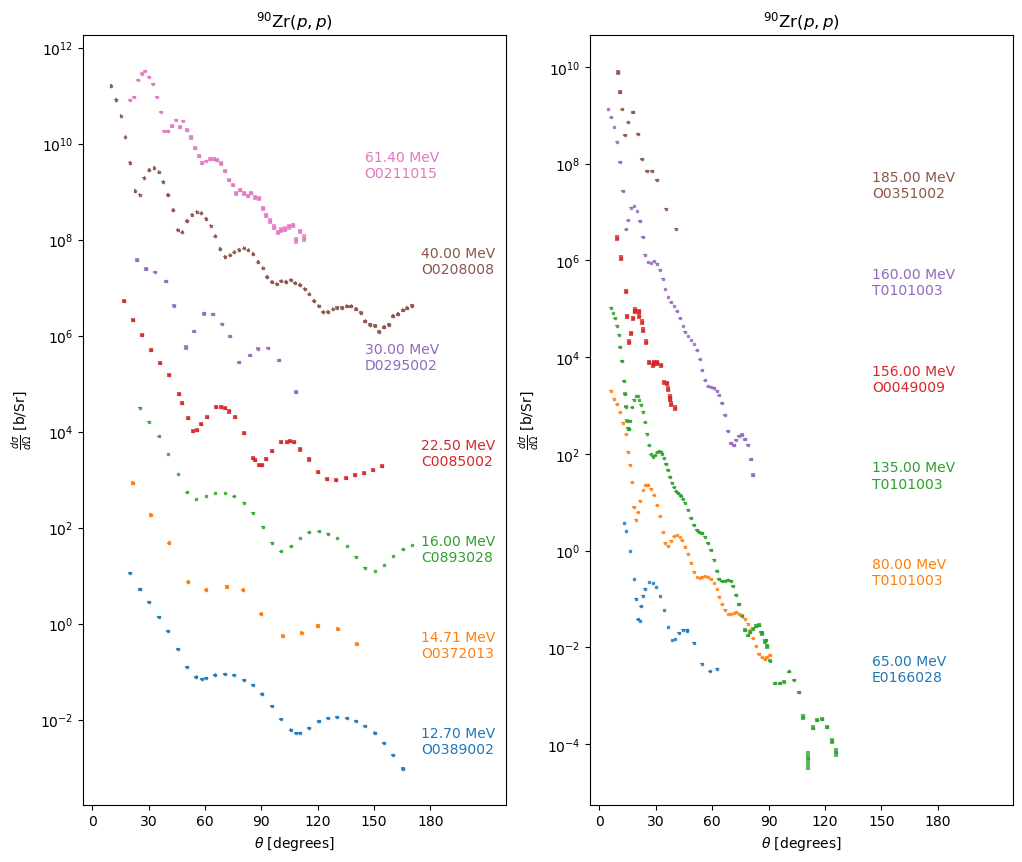

In [44]:
n_per_plot = 7
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
if not isinstance(axes,np.ndarray):
    axes = [axes]
for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_pp.values())[0].data_symbol,
        rxn_label=list(entries_pp.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.002,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
    axes[i].set_xlim([-5, 220])

## plot $(p,p)$ ratio

In [31]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(entries_ppr)

In [32]:
[[(m.subentry, m.Einc) for m in l] for l in measurements_categorized]

[[('O0370002', 18.8)],
 [('F0733003', 25.05)],
 [('O0788017', 49.35)],
 [('O1825003', 57.5)],
 [('O0211007', 61.4)],
 [('O0300004', 100.4)]]

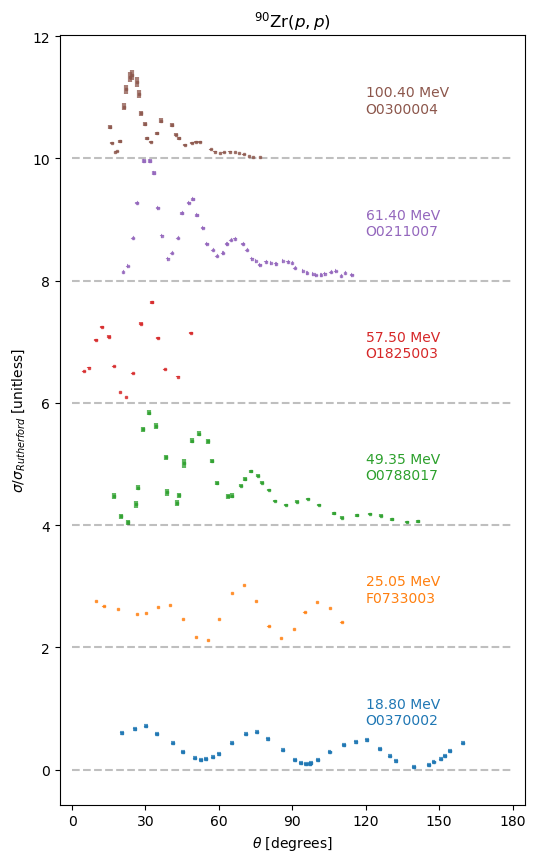

In [35]:
n_per_plot = 9
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
if not isinstance(axes,np.ndarray):
    axes = [axes]

for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot
    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=2,
        data_symbol=list(entries_ppr.values())[0].data_symbol,
        rxn_label=list(entries_ppr.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": 120,
            "label_offset_factor": 3/4,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        log=False,
        draw_baseline=True
    )
    axes[i].set_xlim([-5, 185])

## Plot $(n,n)$

In [46]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(entries_nn)

In [47]:
[[m.Einc for m in l] for l in measurements_categorized]

[[10.0], [11.0], [24.0]]

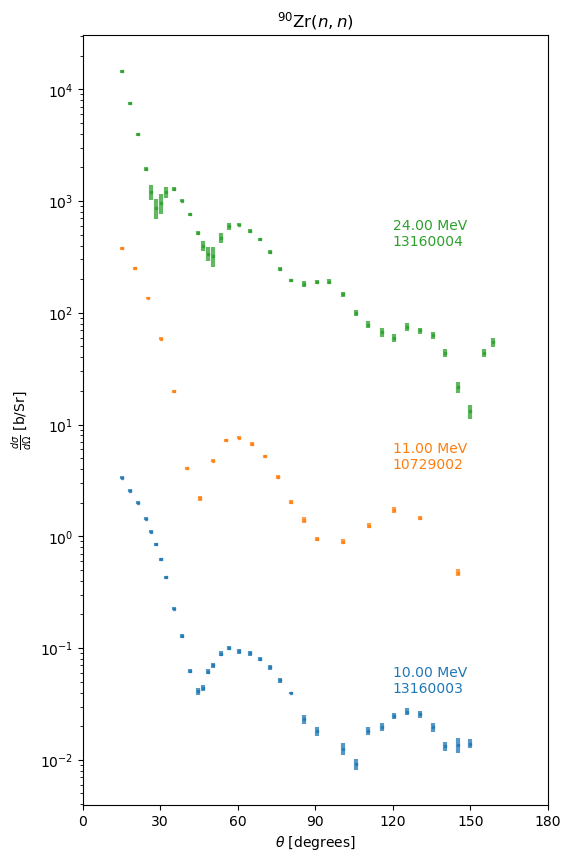

In [51]:
n_per_plot = 6
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
if not isinstance(axes,np.ndarray):
    axes = [axes]

for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_nn.values())[0].data_symbol,
        rxn_label=list(entries_nn.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": 120,
            "label_offset_factor": 0.04,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )

# Write data to disk

In [52]:
A, Z = target
with open(f"{elements[Z]}{A}_diff_xs.pkl", "wb") as f:
    pickle.dump({"n,n": entries_nn, "p,p": { "absolute" :  entries_pp , "ratio" : entries_ppr }}, f)